In [10]:
!echo $USER, $HOSTNAME
!date
!export OMP_NUM_THREADS=2

bidu, pc013047
Wed Nov 19 07:45:18 -03 2025


## Coined quantum walk on a hypercube

In [11]:
import hiperwalk as hpw
import numpy as np
myHPC_option=None
#myHPC_option="cpu"
import os
os.environ["OMP_NUM_THREADS"] = "2" 

hpw.set_hpc(myHPC_option)

BD, em def set_hpc(hpc), hpc= None


### Defining the graph and the QW instance

The next command creates a hypercube with name 'cube', which is an instance of the Graph class. The dimension of the hypercube in 'n'.

In [12]:
n =3
cube = hpw.Hypercube(n)

 num_arcs = 24
em hiperwalk/graph/hypercube.py: def Hypercube(dim, multiedges=
em hiperwalk/graph/hypercube.py: g= <hiperwalk.graph.graph.Graph object at 0x793a2ba3e930>


The next command creates a QW on the hypercube, which is an instance of the Coined class.

In [13]:
os.environ["OMP_NUM_THREADS"] = "2" 
qw = hpw.Coined(cube)

em coined.py, __init__
_set_shift     :   Tempo decorrido: 0.000291 segundos
_set_coin      :   Tempo decorrido: 0.000045 segundos
_set_marked    :   Tempo decorrido: 0.000046 segundos
BD, em hiperwalk/quantum_walk/coined.py: def _set_evolution
BD, em _set_evolution, CALL  C = self.get_coin(), monta a matriz CSR 
++++++  em hiperwalk/quantum_walk/coined.py: get_coin(self)
em get_coin: self._coin= ['grover', 'grover', 'grover', 'grover', 'grover']
em get_coin: scipy.sparse.issparse(self._coin) = False
em get_coin(self), semi-final 
coin_list[:5]= ['grover', 'grover', 'grover', 'grover', 'grover']
em def _coin_list_to_explicit_coin, blocks[0].dtype= float64
type(S.indices)   =  <class 'numpy.ndarray'>
S.indices.dtype   =  int64
indices contiguous:  True
S.indptr.dtype    =  int64
indptr contiguous :  True
type(S)           =  <class 'scipy.sparse._csr.csr_array'>
S.dtype           =  int8
S.data.dtype      =  int8
data contiguous   :  True
type(C.indices)   =  <class 'numpy.ndarray'>
C.i

### Setting the initial state in the center

There are many equivalent ways (two of them are described below) to define the initial state: 

$$\sum_{v\in N(0)}\frac{|(0,v)\rangle}{\sqrt{n}},$$

where $N(0)$ is the neighborhood of vertex 0. Note that the computational basis is comprised of arcs. This initial state is equivalent to a uniform superposition of the coin state when the walker is on vertex $0$. The easiest way of creating this initial state is using the 'uniform_state' method. The input is a list of vertices.

In [14]:
ini_state = qw.uniform_state([0])
print(ini_state)

[0.577 0.577 0.577 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


There is an alternate way to create the same initial state. First, let us check which are the neighbors of vertex 0.

In [15]:
cube.neighbors(0)

array([1, 2, 4])

The vertices of the hypercube range from 0 to $2^n - 1$. The neighbors of vertex 0 are 1, 2, 4, 8, etc., because they have a Hamming distance of one from vertex 0. An arbitrary state can be created with the 'state' method by inputting a list of (amplitude, arc) pairs. The notation for an arc is (tail, head), where both tail and head are vertices. The arcs with a tail of 0 include (0,1), (0,2), (0,4), and so on. This method creates the equivalent initial state.

In [16]:
ini_state = qw.state([(1/np.sqrt(n), (0,2**i)) for i in range(n)])
print(ini_state)

em coined.py: def state
em coined.py: def state, return
[0.577 0.577 0.577 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


### Probability distribution over the hypercube graph

BD, em hiperwalk/quantum_walk/quantum_walk.py:    def simulate
BD, start=1, end=3, step=1
em quantum_walk.py: def _prepare_engine(self, state, hpc =  None
BD, em simulate, initial state, state= [ 0.577  0.577  0.577  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000];  state.l2Norm= 1.0
BD, em def _simulate_step, step = 0
BD, em def simulate,                     state_index =  0
BD, em def _simulate_step, step = 1
BD, em def _simulate_step, SciPy, BEFORE CALL self._simul_mat @ self._simul_vec
self._simul_vec_out= [ 0.000  0.000  0.000  0.577  0.000  0.000  0.000  0.577  0.000  0.000  0.000  0.000  0.000  0.000  0.577  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000];  self._simul_vec_out.l2Norm= 1.0
BD, em def simulate,                     state_index =  1
BD, em def _simulate_step, step = 1
BD, em def _simulate_step, SciPy, BEFORE CALL self._simul_mat @ self._simul_vec
self._s

WhileIt  : Tempo decorrido: 0.000551 segundos


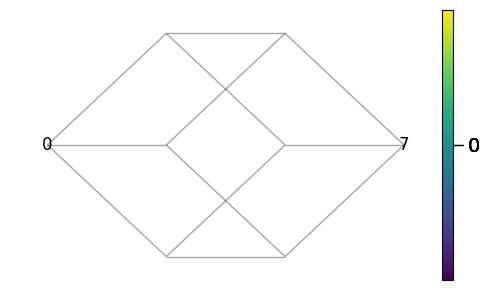

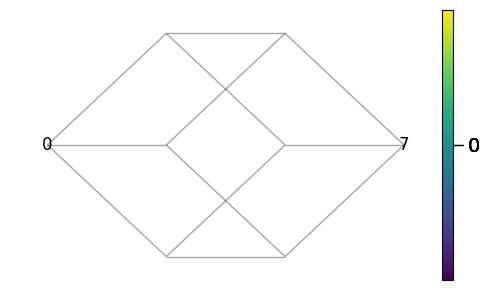

In [17]:
aNumSteps=2
myNumSteps   =aNumSteps
startStep=1;endStep=startStep+myNumSteps;step=1
aRange=(startStep,endStep,step)
final_state = qw.simulate(range=aRange, state=ini_state)
    
#final_state = qw.simulate(range = (n,n+1), state = ini_state)
probs = qw.probability_distribution(final_state)
hpw.plot_probability_distribution(probs, graph=cube, figsize=(5,3))

### Histogram of the probability distribution

/mnt/c/Users/bidu/OneDrive/aLncc/passeiosQuantNov25/hiperwalk/hiperwalk/plot/_plot.py:769: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim((min_prob, max_prob*1.02))


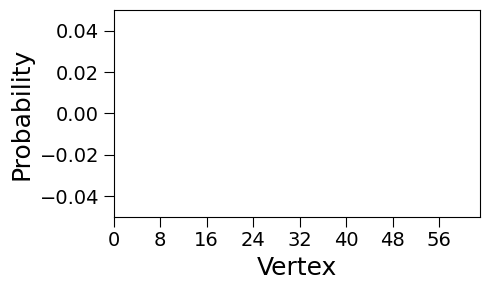

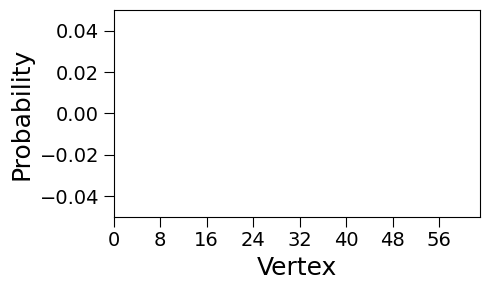

In [8]:
hpw.plot_probability_distribution(probs, plot='histogram', figsize=(5,3))

### Animation of the quantum walk

In [ ]:
list_of_states = qw.simulate(range = (0,n+1), state = ini_state)
list_of_probs = qw.probability_distribution(list_of_states)
hpw.plot_probability_distribution(list_of_probs, graph=cube, animate=True, figsize=(6,3))